<a href="https://colab.research.google.com/github/Jose-Gabriel-Rodriguez/MachineLearning/blob/main/Unidad2/2_Regresion_Lineal_Multiple_Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://github.com/JoseGabriel-ITD/Probabilidad-y-Estadistica/blob/main/Cintilla2004.png?raw=true)

# **Machine Learning y Deep Learning**

## Unidad 2

### Practica 2: **Regresión Lineal Múltiple**

### Facilitador: *Dr. José Gabriel Rodríguez Rivas*

### Alumno:  _____________

### **Regresión Lineal Múltiple**

**Cómo funciona:**  
- Busca una relación lineal entre las variables independientes (X) y la variable dependiente (y). Ajusta una línea (o hiperplano en múltiples dimensiones) que minimiza el error entre los valores predichos y los reales.  

**Ventajas:**

* Fácil de interpretar, pero limitada si los datos tienen relaciones no lineales.
* Rápido y eficiente para datos lineales.  

**Limitaciones:**
* Supone relación lineal entre variables.
* Sensible a valores atípicos y multicolinealidad.

## **1. Cargar datos y librerías**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv("autos2.csv")

# Mostrar las primeras filas
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,13495.0,11.190476,1,False,True,1,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,16500.0,11.190476,1,False,True,1,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,9.038462,16500.0,12.368421,1,False,True,1,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,7.833333,13950.0,9.791667,1,False,True,1,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,10.681818,17450.0,13.055556,1,False,True,1,Low


## **2. Definir variables predictoras y variable objetivo**

In [3]:
X = df[['horsepower', 'engine-size', 'city-mpg', 'wheel-base', 'bore']]
y = df['price']


## **3. Dividir en conjunto de entrenamiento y prueba**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **4. Entrenar modelo de regresión lineal múltiple**

In [5]:

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## **5. Evaluar el modelo**

In [6]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")


Error cuadrático medio (MSE): 31610677.23
Coeficiente de determinación (R²): 0.74


In [7]:
# Calcular el RMSE (más fácil de interpretar que el MSE)
rmse = np.sqrt(mse)
print(f"Raíz del Error cuadrático medio (RMSE): {rmse:.2f}")


Raíz del Error cuadrático medio (RMSE): 5622.34


## **6. Coeficientes del modelo**

In [8]:
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
})

print(coef_df)
print(f"Intersección (bias): {model.intercept_:.2f}")


      Variable  Coeficiente
0   horsepower    47.316135
1  engine-size    85.738718
2     city-mpg   -94.052553
3   wheel-base   263.370535
4         bore -1099.578480
Intersección (bias): -22914.90


### **Interpretación**

#### **1. RMSE ≈ $5,622**

* El error promedio en las predicciones es de 5,622, lo cual es alto, especialmente considerando que muchos de los autos en el dataset tienen precios entre 8,000 y 16,000.

* En esos casos, este error puede representar entre un 34% y un 72% del valor real, lo que lo hace poco confiable para estimaciones exactas.

#### **2. R² = 0.74**

* El modelo solo explica el 74% de la variación en los precios, dejando un 26% sin explicar.
* Esto sugiere que la relación entre las variables independientes y el precio no es completamente lineal, y que la regresión lineal no captura bien las complejidades del problema.

## **7. Comparar precios reales vs. predichos**

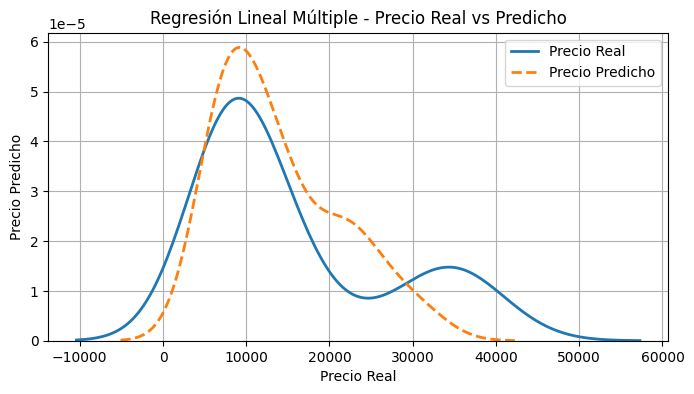

In [9]:
plt.figure(figsize=(8, 4))
sns.kdeplot(y_test, label='Precio Real', linewidth=2)
sns.kdeplot(y_pred, label='Precio Predicho', linewidth=2, linestyle='--')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Regresión Lineal Múltiple - Precio Real vs Predicho")
plt.grid(True)
plt.legend()
plt.show()

### **En la imagen se observa que:**
- Ambas curvas (azul y naranja) tienen picos principales alrededor de 8,000–12,000, lo cual sugiere que el modelo sí capta el rango más frecuente de precios.
- Sin embargo, la curva predicha (naranja) está ligeramente desplazada a la izquierda y con un pico más alto, lo que indica que el modelo:
  - tiende a subestimar los precios reales, y
  - genera predicciones más concentradas (menos dispersión) que los precios reales.

Por lo tanto, la regresión lineal múltiple no está captando toda la variabilidad de precios.

### **Aspectos a tomar en cuenta para interpretar la imagen**  
-- Si las dos curvas se superponen bastante, significa que el modelo predice precios con una distribución similar a la real, lo cual es buena señal global (el modelo capta la tendencia general del precio).
- Si hay desplazamientos horizontales (por ejemplo, la curva naranja está más a la derecha o izquierda), indica sesgo sistemático:
  - A la derecha → el modelo tiende a sobreestimar los precios.
  - A la izquierda → el modelo tiende a subestimar los precios.
- Si la forma de la curva predicha es diferente (más estrecha, más plana o con picos en lugares distintos), el modelo no está captando bien la variabilidad de los precios



### **Diagrama de dispersión**

También, se puede usar un gráfico de dispersión (scatter plot) para evaluar visualmente el rendimiento del modelo de Regresión lineal múltiple comparando los precios reales (y_test) con los precios predichos (y_pred).

Cada punto rojo corresponde a una observación (un vehículo) y muestra:
- En el eje X → el precio real del vehículo.
- En el eje Y → el precio predicho por el modelo de regresión lineal múltiple.

En un modelo de regresión perfecto, todos los puntos deberían quedar alineados sobre la diagonal imaginaria que va del punto (mínimo, mínimo) al (máximo, máximo).  
Esa línea representa el caso en que:

#### *Precio Predicho = Precio Real*

Es decir, sin error de predicción.

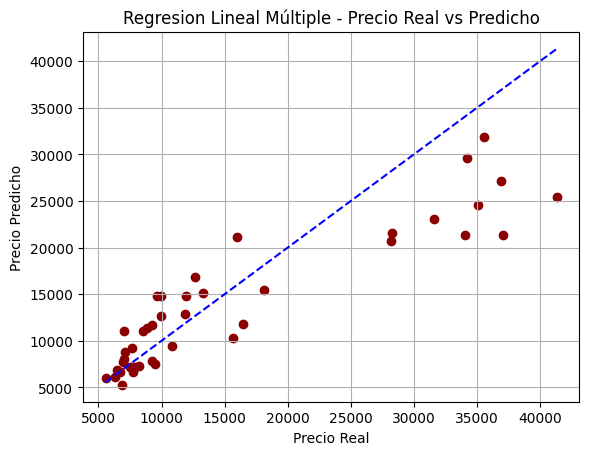

In [14]:
plt.scatter(y_test, y_pred, color='darkred')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--')  # Línea ideal
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Regresion Lineal Múltiple - Precio Real vs Predicho")
plt.grid(True)
plt.show()

### **Interpretacion del gráfico de dispersión**

* Los **puntos forman una tendencia creciente** (a mayor precio real, mayor precio predicho).
→ Esto indica que **el modelo sí aprende la relación general** entre las características del vehículo y su precio.
* Sin embargo, los puntos **no están perfectamente alineados con la diagonal**:
  * Hay cierta dispersión vertical, lo que indica que el modelo comete errores de predicción (difiere del valor real).
  * Algunos puntos están por encima de donde deberían → el modelo sobreestima el precio real.
  * Otros están por debajo → el modelo subestima el precio.
* **Existe una relación positiva clara** (más precio real → más precio predicho).
* **La dispersión es moderada**, por lo que el modelo de Regresión Lineal parece tener buen ajuste global.
* No hay patrones extraños (como nubes horizontales o dispersión aleatoria), lo que sugiere que el modelo **no está fallando sistemáticamente** en un rango de precios.

#### **Resumen**
| Elemento                             | Interpretación                     |
| ------------------------------------ | ---------------------------------- |
| **Puntos cercanos a la diagonal**    | Predicciones precisas              |
| **Puntos dispersos**                 | Mayor error de predicción          |
| **Puntos por encima de la diagonal** | Sobreestimación                    |
| **Puntos por debajo**                | Subestimación                      |
| **Tendencia global creciente**       | Modelo aprende la relación general |
